<div>
<br>
<h1>Amazon Sales Data Analysis</h1>
<br>
<p style="font-size: 16px">
    This notebook provides visualisation of Amazon India's sales in <b>Quarter 2 - 2022</b> and the relationship between different categories of sales data, thus offering some insights into the business's profitability.
</p>
</div>
<hr>

## The Datasets

<p style="font-size: 16px; text-align:justify">
The two datasets used in this notebook come from <a style ="color:#A41F13" href = 'https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data', alt="link">Kaggle</a>. They contain a variety of detailed information about transactions (such as date, categories, quantity, size, color, etc.), making it useful for a wide range of data analyses on the profitability of Amazon's e-commerce sales.
</p>
<br>

<b style='font-size:16px'>1. Amazon Sale Report.csv</b><br>
<p style='font-size:16px'>The 'Amazon Sale Report' dataset includes 24 columns and 128,975 rows of Amazon sales observation data. Each row represents a unique observation set which contains the attributes show in hte table below: </p><br>

| Attribute        | Data Type | Description                             |
|------------------|-----------|-----------------------------------------|
| index            | Integer   |  Index                                  |
| Order ID         | String    |  Order ID                               | 
| Date             | Datetime  |  Date of the sale                       |
| Status           | String    |  Status of the sale                     |
| Fulfillment      | String    |  Method of fulfillment                  |
| Sales Channel    | String    |  Sales Channel                          |
| ship-service-level| String   |  Ship Service Level                     |
| Style            | String    |  Style of the product                   |
| SKU              | String    |  Stock Keeping Unit                     |
| Category         | String    |  Type of product                        |
| Size             | String    |  Size of the product                    |
| ASIN             | String    |  Amazon Standard Identification Number  |
| Courier Status   | Integer   |  Status of the courier                  |
| Qty              | Integer   |  Quantity of the product                |
| currency         | String    |  The currency used for the sale         |
| Amount           | Float     |  Amount of the sale                     |              
| ship-city        | String    |  Ship City                              |
| ship-state       | String    |  Ship State                             |
| ship-postal-code | String    |  Ship Postal Code                       |
| ship-country     | String    |  Ship Country                           |
| promotion-ids    | String    |  Promotion IDs                          |
| B2B              | Boolean   |  Business to business sale              |
| fulfilled-by     | String    |  Fulfilled By                           |
| Unnamed: 22      | String    |  Unnamed: 22                            |

<br>
<br>
<b style='font-size:16px'>2. Sale Report.csv</b><br>
<p style='font-size:16px'>The 'Sale Report' dataset includes 7 columns and 9,271 rows of Amazon sales observation data. Each row represents a unique observation set which contains the attributes show in hte table below: </p><br>

| Attribute        | Data Type | Description                             |
|------------------|-----------|-----------------------------------------|
| index            | Integer   |  Index                                  |
| SKU Code         | String    |  Unique identifier for each product     | 
| Design No.       | String    |  Unique identifier for each design      |
| Stock            | Float     |  Number of items in stock               |
| Category         | String    |  Type of product                        |
| Size             | String    |  Size of the product                    |
| Color            | String    |  Color of the product                   |

<br>
<hr>

<h2>Dataset Overview</h2><br>

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify # for treemap
import missingno as msno # handle missing data
import warnings; warnings.filterwarnings(action='ignore') # handle warnings

<br><b style='font-size:16px'>Amazon Sale Report.csv<br>

In [2]:
# The dataset is in current directory
df1 = pd.read_csv('Amazon Sale Report.csv', low_memory = False)
df1.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
# Check data shape
print('df1 has', df1.shape[0], 'rows and', df1.shape[1], 'columns.')

df1 has 128975 rows and 24 columns.


In [4]:
# Show all columns
df1.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
# Dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
# descriptive statistics
df1.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


<br><b style='font-size:16px'>Sale Report.csv<br>

In [7]:
df2 = pd.read_csv('Sale Report.csv', low_memory = False)
df2.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [8]:
print('df2 has', df2.shape[0], 'rows and', df2.shape[1], 'columns.')

df2 has 9271 rows and 7 columns.


In [9]:
df2.columns

Index(['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size',
       'Color'],
      dtype='object')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [11]:
df2.describe()

,index,Stock
count,9271.000000,9235.000000
mean,4635.000000,26.246454
std,2676.451507,58.462891
min,0.000000,0.000000
25%,2317.500000,3.000000
50%,4635.000000,8.000000
75%,6952.500000,31.000000
max,9270.000000,1234.000000


<hr><br><h2>Data Wrangling<br>

In [12]:
# Set index
df1.set_index('index',inplace=True)
df2.set_index('index',inplace=True)

In [13]:
df1.apply(pd.unique) # unique values for each column of df1

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

In [14]:
# Drop unmeaningful columns
df1.drop(columns=['currency','ship-country','fulfilled-by','Unnamed: 22'],inplace=True)
print('df1 now has', df1.shape[0], 'rows and', df1.shape[1], 'columns.\n')

df1 now has 128975 rows and 19 columns.



<h3 style="font-size: 20px"> Handling Missing Values<br>

<p style="font-size: 16px; text-align:justify">
    <b>Figure 1</b> shows that missing values appear in many attributes of df1 <span><i>(ASIN, Courier Status, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, fulfilled-by, Unnamed: 22)</i></span>. We can handle these missing values by filling them with other values such as <span><i>'unknown', 'no promotion'</i></span>.
    </p><br>

In [15]:
df1.isnull().sum() # total null values of each column

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
dtype: int64

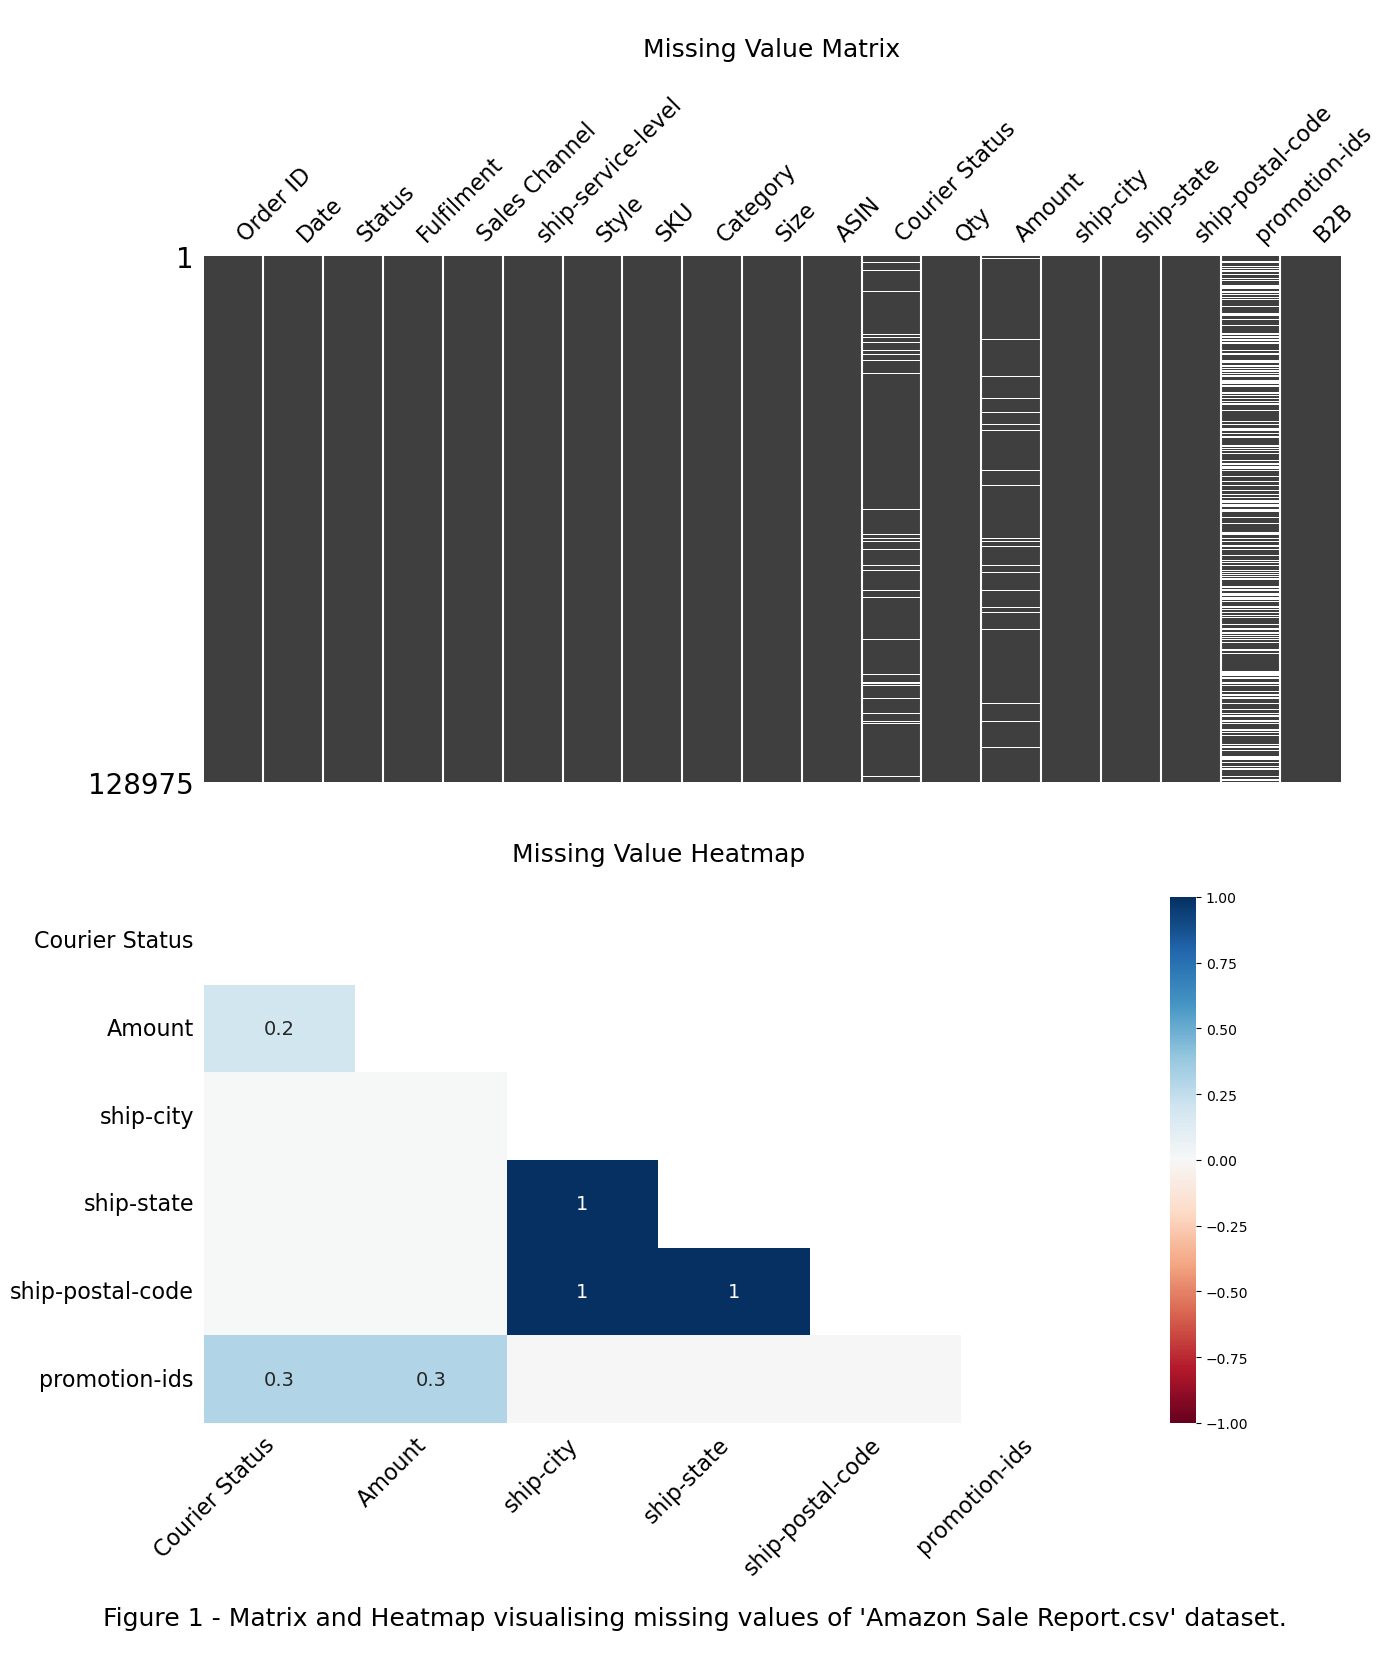

In [16]:
# Visualise missing values of df1 through matrix and heatmap
f,(ax1,ax2) = plt.subplots(2,1,figsize=(14,16))
msno.matrix(df1,ax=ax1)
msno.heatmap(df1,ax=ax2)
ax1.set_title('\nMissing Value Matrix\n',fontsize=18)
ax2.set_title('\nMissing Value Heatmap\n',fontsize=18)
plt.figtext(0.5, -0.04, "\nFigure 1 - Matrix and Heatmap visualising missing values of 'Amazon Sale Report.csv' dataset.\n", ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

In [17]:
# Filling missing values of df1
df1['Amount'].fillna(0, inplace = True)
df1['Courier Status'].fillna('unknown', inplace = True)
df1['ship-city'].fillna('unknonw', inplace = True)
df1['ship-state'].fillna('unknown', inplace=True)
df1['ship-postal-code'].fillna('unknown', inplace=True)
df1['promotion-ids'].fillna('no promotion', inplace=True)
df1.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

<br><br><p style="font-size: 16px; text-align:justify">
    <b>Figure 2</b> shows that df2 has missing values in all of it attributes <span><i>(SKU Code, Design No., Stock, Category, Size, Color, Size, Color)</i></span>.Here we handle these missing values by dropping them and replacing them with other values.<br>
    </p><br>

In [18]:
df2.isnull().sum()

SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

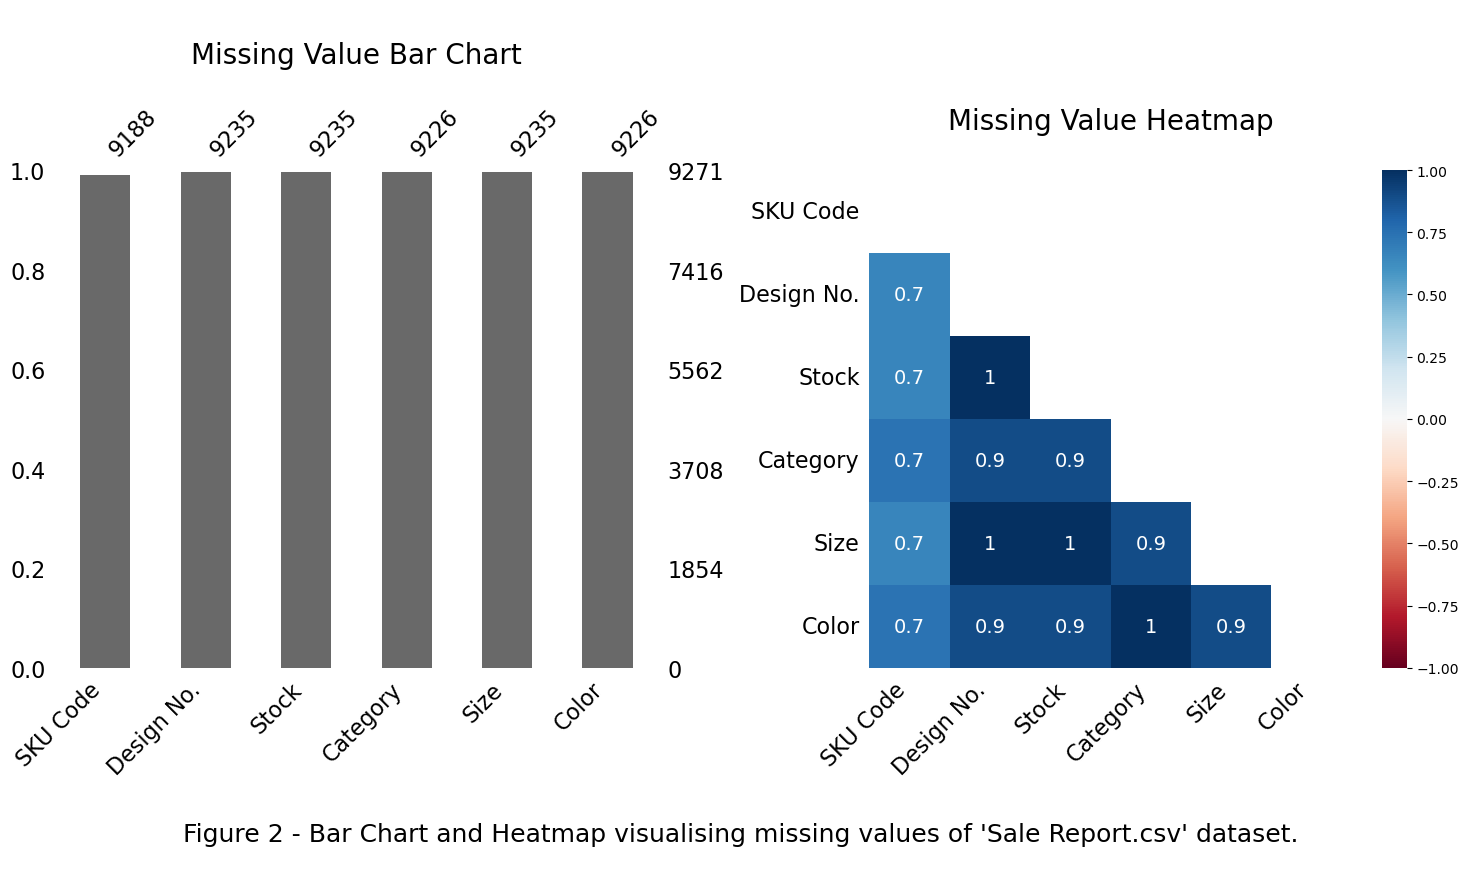

In [19]:
# Visualise missing values of df2 through matrix and heatmap
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
msno.bar(df2,ax=ax1)
msno.heatmap(df2,ax=ax2)
ax1.set_title('\nMissing Value Bar Chart\n',fontsize=20)
ax2.set_title('\nMissing Value Heatmap\n',fontsize=20)
plt.figtext(0.5, -0.1, "\nFigure 2 - Bar Chart and Heatmap visualising missing values of 'Sale Report.csv' dataset.\n", ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

In [20]:
df2.dropna(subset=['Design No.'],inplace=True)
df2.isnull().sum()

SKU Code      47
Design No.     0
Stock          0
Category       9
Size           0
Color          9
dtype: int64

In [21]:
# Filling missing values of df2
df2['SKU Code'].fillna('unknown', inplace=True)
df2['Category'].fillna('unknown', inplace=True)
df2['Color'].fillna('unknown', inplace=True)
df2.isnull().sum()

SKU Code      0
Design No.    0
Stock         0
Category      0
Size          0
Color         0
dtype: int64

<br><h3 style="font-size: 20px"> Re-structuring Data

In [22]:
# rename df1 for clarity
col_names = {'Order ID': 'order_id', 'Date':'date', 'Status':'status', 'Fulfilment':'fulfilment', 'ship-service-level':'ship_service_level', 'Style':'style', 'SKU':'SKU', 'Category':'category', 'Size':'size','ASIN':'ASIN', 'Courier Status':'courier_status', 'Qty':'quantity', 'Amount':'order_value', 'ship-city':'city', 'ship-state':'state','ship-postal-code':'postal_code','promotion-ids':'promotion_id','B2B':'customer_type'}
df1.rename(columns = col_names, inplace = True)

# convert 'date' to datetime
df1['date']=pd.to_datetime(df1['date'])
# extract month and day
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

# create a function to move columns
def moveCol(df1, column, pos):
    col = df1.pop(column)
    df1.insert(pos,column,col)
    return df1
df1 = moveCol(df1,'month',3)
df1 = moveCol(df1,'day',2)

df1.head(3)

,order_id,date,day,status,month,fulfilment,Sales Channel,ship_service_level,style,SKU,...,size,ASIN,courier_status,quantity,order_value,city,state,postal_code,promotion_id,customer_type
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,30,Cancelled,4,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,2022-04-30,30,Shipped - Delivered to Buyer,4,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,30,Shipped,4,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True


In [23]:
print('\nEarliest day:', df1['date'].min())
print('\nLatest day:', df1['date'].max())
df1['month'].unique()


Earliest day: 2022-03-31 00:00:00

Latest day: 2022-06-29 00:00:00


array([4, 3, 5, 6])

<br><blockquote style="font-size:16px; text-align:justify">
Since the sales data in March starts at 31st (last day of month), we do not include it in this analysis and just focus on the second quarter of 2022 (which includes April, May, and June).

In [24]:
# drop sales data of March
df1 = df1[(df1['month'] != 3)]
# rename months
df1['month'].replace([4,5,6],['April','May','June'],inplace=True)
df1.head()

,order_id,date,day,status,month,fulfilment,Sales Channel,ship_service_level,style,SKU,...,size,ASIN,courier_status,quantity,order_value,city,state,postal_code,promotion_id,customer_type
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,30,Cancelled,April,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,2022-04-30,30,Shipped - Delivered to Buyer,April,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,30,Shipped,April,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,2022-04-30,30,Cancelled,April,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,407-1069790-7240320,2022-04-30,30,Shipped,April,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,...,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False


In [25]:
# convert INR to AUD
df1['order_value'] = round(df1['order_value'].apply(lambda x: x * 0.018),2) # exchange rate = 0.018
df1['order_value'].head()

index
0    11.66
1     7.31
2     5.92
3    13.56
4    10.33
Name: order_value, dtype: float64

In [26]:
# lowercase names in df2
df2.columns = df2.columns.str.lower()
df2

,sku code,design no.,stock,category,size,color
index,,,,,,
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal


<hr><br><h2>Visualising Amazon Daily and Monthly Total Sales in Q2-2022<br>

<h3>How do Amazon daily sales fluctuate throughout the quarter?<br>

<p style='font-size:16px; text-align: justify'>
    <b>Figure 3</b> below shows that Amazon India witnessed wild fluctuations in its daily revenue during the second quarter of 2022. Despite wild fluctuations, the daily sales still remained above the average of <span>&#36;15,697.92</span> for most of the time until mid-June before plummeting to below <span>&#36;8000</span> at the end of June, which is a decrease by approximately 50% compared to the beginning of the quarter (nearly <span>&#36;16,000</span>).
</p><br>

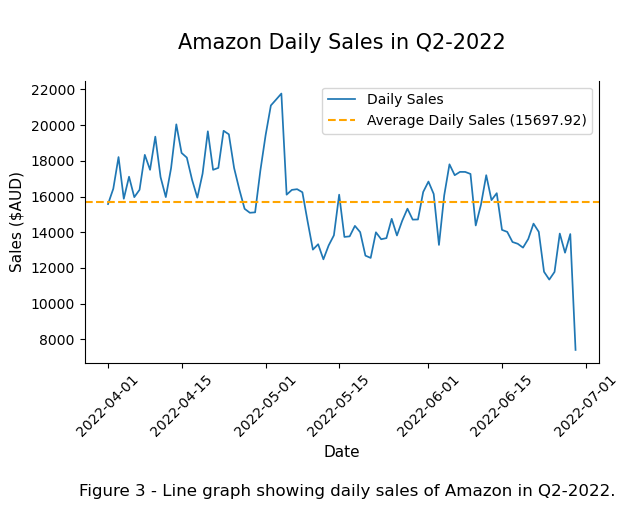

In [27]:
df1 = df1.sort_values(by='date') # Sort by dates
daily_sales = df1.groupby('date')['order_value'].sum()

# Plot daily sales
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', linewidth=1.25)
plt.axhline(y=daily_sales.mean(), linestyle='--', linewidth=1.5, color='orange',
            label=f'Average Daily Sales ({daily_sales.mean():.2f})')
plt.xlabel('Date',fontsize=11)
plt.ylabel('Sales ($AUD)',fontsize=11)
plt.title('\nAmazon Daily Sales in Q2-2022\n',fontsize=15)
plt.figtext(0.55, -0.05, "Figure 3 - Line graph showing daily sales of Amazon in Q2-2022.", ha='center', va='bottom', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False) # hide top spine
plt.tight_layout()
plt.show()

<h3>How much does daily sales deviate from the average?<br>

<p style='font-size:16px; text-align: justify'>
    Although Amazon witnessed a decline in its daily sales, <b>Figure 4</b> shows that its daily average sales increased from around <span>&#36;10.5</span> at the beginning to nearly <span>&#36;11.5</span> at the end of the quarter.<br><br>
    Amazon's daily sales variability is also demonstrated by light-blue shaded areas. Wider shaded areas (especially in the second half of the quarter) indicate days where sales deviated more from the average. This can be attributed to different factors such as promotions, seasonal trends, economic fluctuations, etc., which worths investigating more.</p><br>

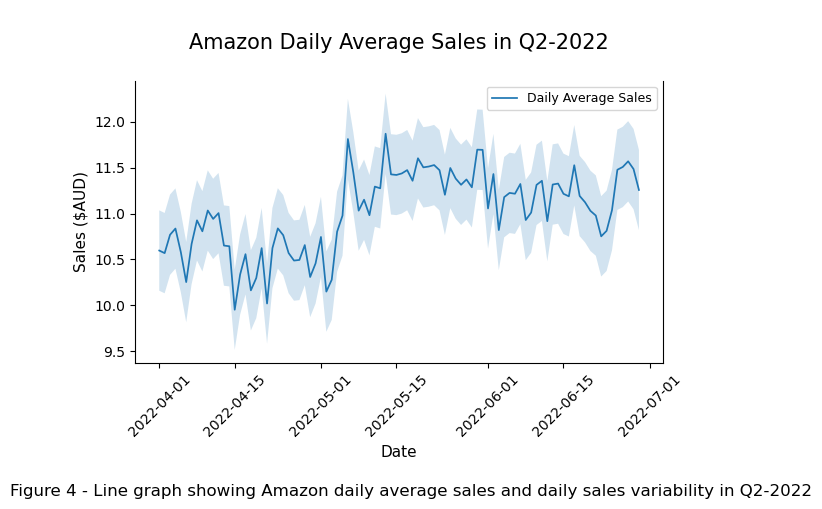

In [28]:
daily_avg_sales = df1.groupby('date')['order_value'].mean() # Daily average sales
daily_sales_std = daily_avg_sales.std() # Daily sales standard deviation

# Plot average daily sales and its standard deviation
plt.plot(daily_avg_sales.index, daily_avg_sales.values, label='Daily Average Sales', linewidth=1.25)
plt.fill_between(daily_avg_sales.index, daily_avg_sales.values + daily_sales_std, daily_avg_sales.values - daily_sales_std, alpha=0.2)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Sales ($AUD)', fontsize=11)
plt.title('\nAmazon Daily Average Sales in Q2-2022\n', fontsize=15)
plt.figtext(0.55, -0.05, "Figure 4 - Line graph showing Amazon daily average sales and daily sales variability in Q2-2022", ha='center', va='bottom', fontsize=12)
plt.legend(loc='best', fontsize=9)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

<br><h3>How do monthly sales and monthly average sales fluctuate throughout the quarter?

<p style='font-size:16px; text-align: justify'>
    <b>Figure 5</b> depicts two trends in the sales by month of Amazon in the second quarter of 2022. While the monthly sales experienced a decrease by 9.1% from <span>&#36;519,077.83</span> to <span>&#36;472,074.06</span>, the monthly average sales increased gradually from <span>10.58</span> in April to <span>&#36;11.19</span> in May and finally to <span>&#36;11.23</span> in June. This can be due to the lower number of transactions which cause the total revenue in May to decline compared to the previous month.
    
</p><br>


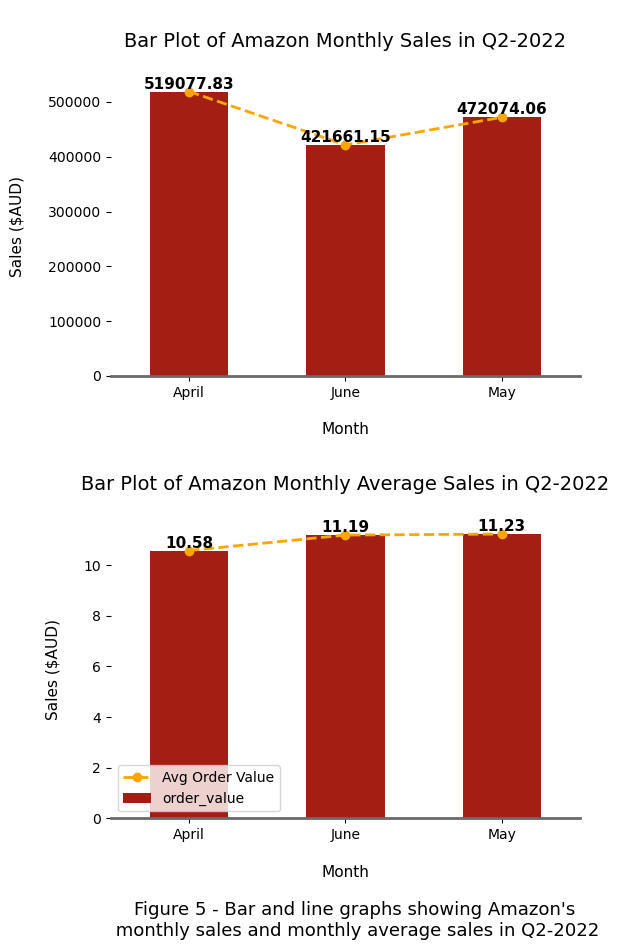

In [29]:
salesByMonth = df1.groupby('month')['order_value'].sum()
avg_order_val = round(df1.groupby('month')['order_value'].mean(),2)

# Plot monthly sales and monthly average sales using line and bar charts
f,(ax1,ax2) = plt.subplots(2,1,figsize=(6,9))

# Bar chart for monthly sales (ax1)
bar_monthly_sales = salesByMonth.plot(kind='bar', ax=ax1, color='#A41F13')
ax1.set_title('\nBar Plot of Amazon Monthly Sales in Q2-2022\n', fontsize=14)
ax1.set_xlabel('\nMonth', fontsize=11)
ax1.set_ylabel('Sales ($AUD)\n', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')

# Line chart for monthly sales (ax1)
ax1.plot(salesByMonth.index, salesByMonth.values, linestyle='--', linewidth=2, color='orange', marker='o', label='Monthly Sales')

# Add annotations
for i, val in enumerate(salesByMonth):
    ax1.text(i, val, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('dimgrey')

# Bar plot for monthly average sales (ax2)
avg_order_val.plot(kind='bar', ax=ax2, color='#A41F13')
ax2.set_title('\nBar Plot of Amazon Monthly Average Sales in Q2-2022\n', fontsize=14)
ax2.set_xlabel('\nMonth', fontsize=11)
ax2.set_ylabel('Sales ($AUD)\n', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')

# Line chart for monthly average sales (ax2)
ax2.plot(avg_order_val.index, avg_order_val.values, linestyle='--', linewidth=2, color='orange', marker='o', label='Avg Order Value')


# Add annotations
for i, val in enumerate(avg_order_val.values):
    ax2.text(i, val, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['bottom'].set_color('dimgrey')
ax2.legend(loc='best')

plt.figtext(0.6, -0.05, "Figure 5 - Bar and line graphs showing Amazon's\n monthly sales and monthly average sales in Q2-2022", ha='center', va='bottom', fontsize=13)
plt.tight_layout()
plt.show()

<hr><br><br><h2>Visualising Amazon Sales by Product Categories in Q2-2022

<br><h3>How does order value's distribution vary across different categories and within each category?

<p style='font-size:16px; text-align: justify'>
    <b>Figure 6</b> shows the relationship between product categories and order value, from which we can draw the following insights:<br><br>
    - There is price dispersion within categories. Taller violins such as 'Set', 'kurta', 'Western Dress' and 'Saree' indicate a broader range of order values within that category. There could be both very expensive and very affordable options.<br><br>
    - The box plot elements show that the median order values for 'Set', 'Ethinic Dress', 'Saree' are higher compared to other categories, suggesting these might be pricier product types on average.<br><br>
    - The shapes of the violins, particularly for "Kurta", "Western Dress", and "Bottom" (with wider middle areas), show that order values are concentrated around the median for these categories. This suggests less variation in price for most products within these categories.<br>
</p><br>


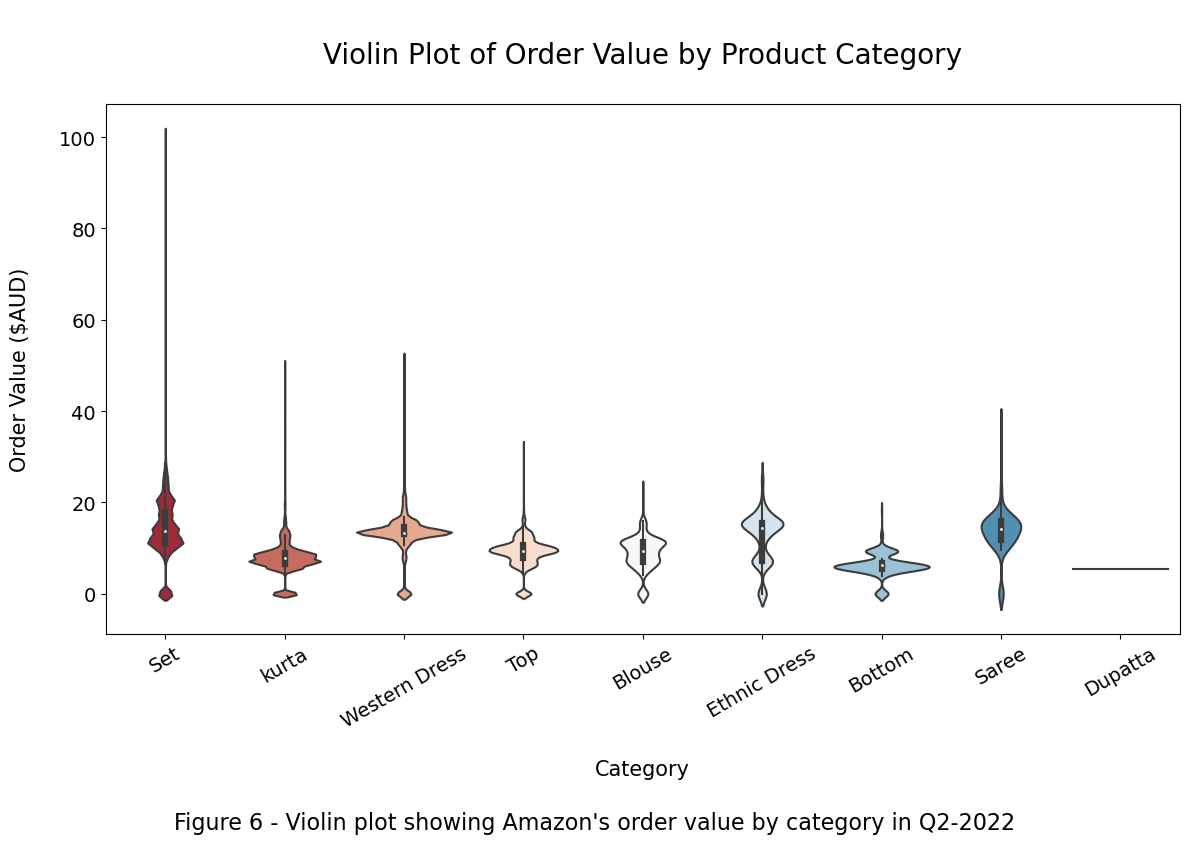

In [30]:
# Violin plot for each category's order value
plt.figure(figsize=(12,8))
sns.violinplot(x='category',y='order_value',data=df1,palette='RdBu',linewidth=1.5)
plt.title('\nViolin Plot of Order Value by Product Category\n', fontsize=20)
plt.xlabel('\nCategory',fontsize=15)
plt.ylabel('Order Value ($AUD)\n',fontsize=15)
plt.figtext(0.5, -0.05, "Figure 6 - Violin plot showing Amazon's order value by category in Q2-2022", ha='center', va='bottom', fontsize=16)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
df1.groupby('category')['order_value'].median() # Median order value of each category

category
Blouse            9.320
Bottom            6.170
Dupatta           5.490
Ethnic Dress     14.365
Saree            14.220
Set              13.660
Top               9.320
Western Dress    13.390
kurta             7.780
Name: order_value, dtype: float64

In [32]:
salesByCategory = df1.groupby('category')['order_value'].sum() # total sales for each product category
salesByCategory = salesByCategory.sort_values(ascending=False) # sort the results from highest to lowest sales volumne
salesByCategory

category
Set              704685.20
kurta            382781.74
Western Dress    201751.20
Top               96169.04
Ethnic Dress      14221.36
Blouse             8245.43
Bottom             2711.95
Saree              2230.65
Dupatta              16.47
Name: order_value, dtype: float64

<blockquote style="font-size:16px; text-align:justify">
    It can be seen from the results above that the 5 categories: <i> Blouse, Bottom, Dupatta, Ethnic Dress, Saree </i> do not contribute much to the total sales of Amazon compared to other categories in the second quarter in 2022. Therefore, we can combine them into a category called <i>'Others'</i>.

In [33]:
# Total sales of the least 5 profitable categories
others = round((salesByCategory[salesByCategory.index[-5:]].sum()),2)
# Drop least profitable categories
salesByCategory = salesByCategory.drop(salesByCategory.index[-5:])
# Add 'Others' category
salesByCategory['Others'] = others
salesByCategory = salesByCategory.sort_values(ascending=True)
salesByCategory

category
Others            27425.86
Top               96169.04
Western Dress    201751.20
kurta            382781.74
Set              704685.20
Name: order_value, dtype: float64

<br><h3>How are total sales distributed across different Amazon's product categories?

<p style='font-size:16px; text-align: justify'>
    <b>Figure 7</b> shows that in the second quarter of 2022, 'Set' had the highest sales among categories of <span>&#36;704,685.2</span>, making up nearly a half of Amazon's total revenue for the whole quarter, followed by 'kurta' and 'Western Dress' categories with their sales making up 27.09% and 14.28% of the total revenue, respectively.
</p><br>

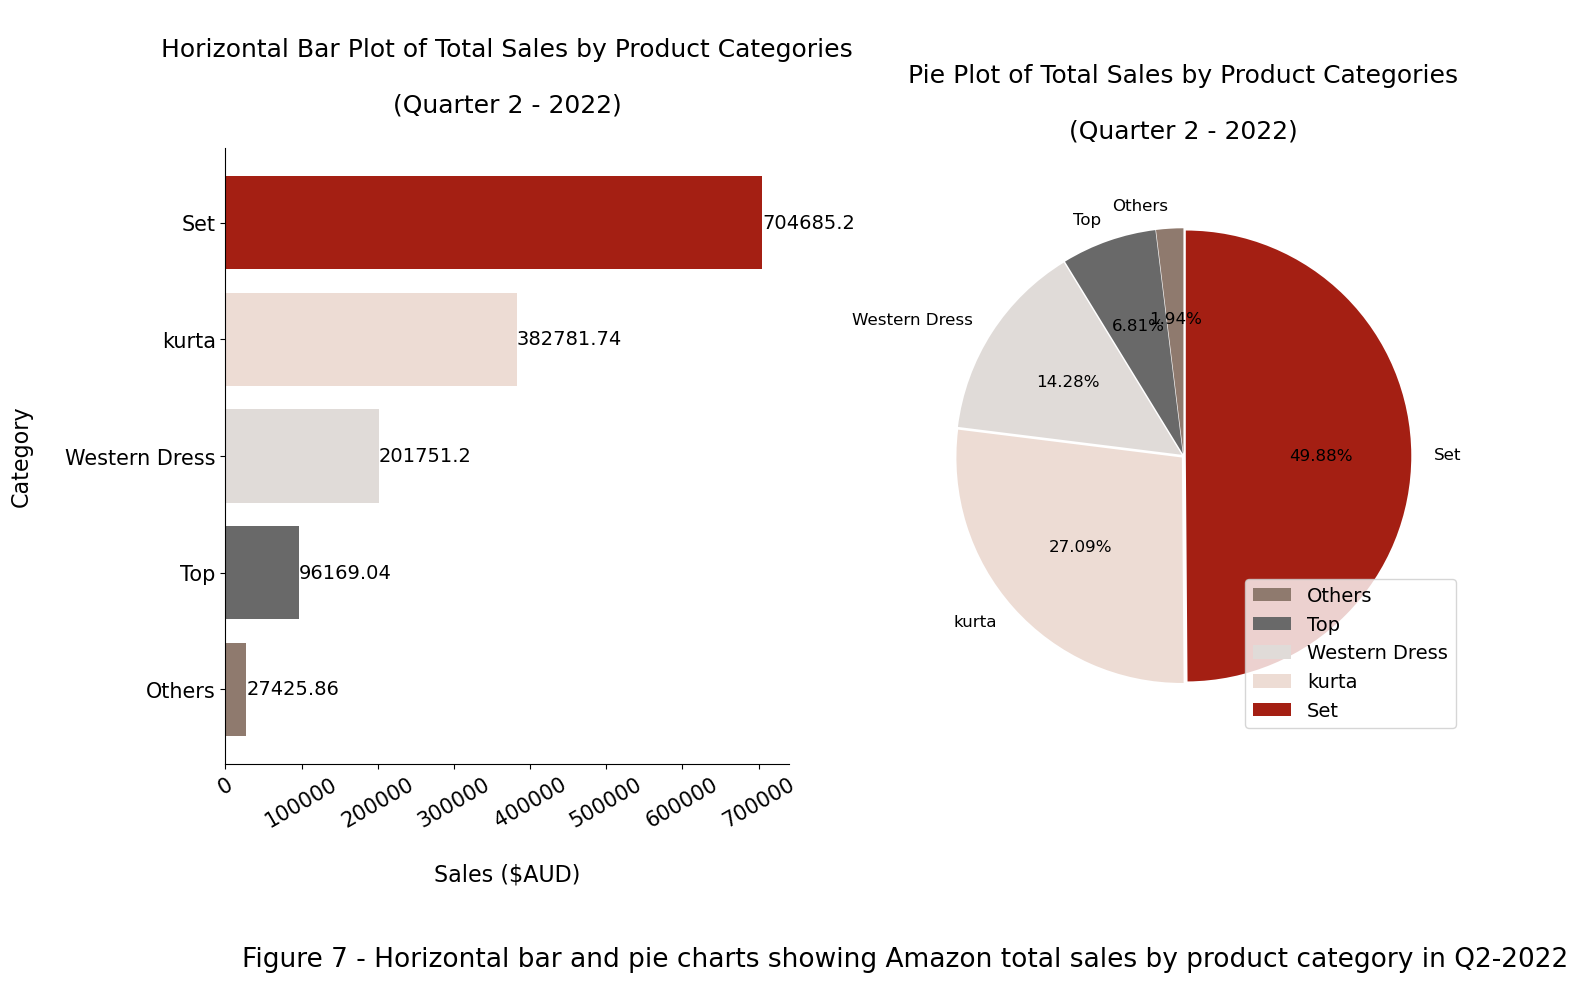

In [44]:
colors = ['#8F7A6E','dimgrey','#E0DBD8','#EDDCD4','#A41F13']
# Horizontal bar plot and pie plot of total sales by category
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# Horizontal Bar Plot
ax1.barh(salesByCategory.index,salesByCategory.values, color = colors)
ax1.set_title('\nHorizontal Bar Plot of Total Sales by Product Categories\n\n(Quarter 2 - 2022)\n',fontsize = 18)
ax1.set_xlabel('\nSales ($AUD)\n', fontsize = 16)
ax1.set_ylabel('Category\n', fontsize = 16)
ax1.tick_params(axis='x', labelsize = 15, rotation=30)
ax1.tick_params(axis='y', labelsize = 15)

# Add annotations
for i, val in enumerate(salesByCategory):
    ax1.text(val, i, str(val), ha='left', va='center', fontsize = 14)
# Spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Pie plot
ax2.pie(salesByCategory,labels=salesByCategory.index, 
        autopct='%1.2f%%',
        textprops = {'fontsize': 12},
        explode = [0.01,0.01,0.01,0.01,0.01], 
        startangle = 90,
        colors = colors)
ax2.set_title('Pie Plot of Total Sales by Product Categories\n\n(Quarter 2 - 2022)\n', fontsize = 18)
plt.figtext(0.55, -0.15, "Figure 7 - Horizontal bar and pie charts showing Amazon total sales by product category in Q2-2022", ha='center', va='bottom', fontsize=19)
ax2.legend(loc='lower right', fontsize = 14)
plt.show()

<br><h3>Monthly Total Sales for Top 4 Product Categories<br>

<p style='font-size:16px; text-align: justify'>
    <b>Figure 8</b> visualizes the sales trends for the top four product categories (set, kurta, western dress, and top) by order value in Q2-2022:
    <br>- The four categories consistently remained the top sellers throughout the entire quarter.
    <br>- The ranking of these categories by sales volume did not change throughout the quarter: 'Set' maintained the top position, followed by 'kurta', 'Western Dress', and then 'Top'. 
    <br>- There were also some fluctuations in all categories' sales. Sales for 'Set', 'kurta' and 'Top' declined throughout Q2-2022, while 'Western Dress' saw an upward trend in its sales at the end of the quarter. The rise in 'Western Dress' sales and decline in other categories can be attributed to marketing campaigns or seasonal factors, which worths analysing further.
</p><br>

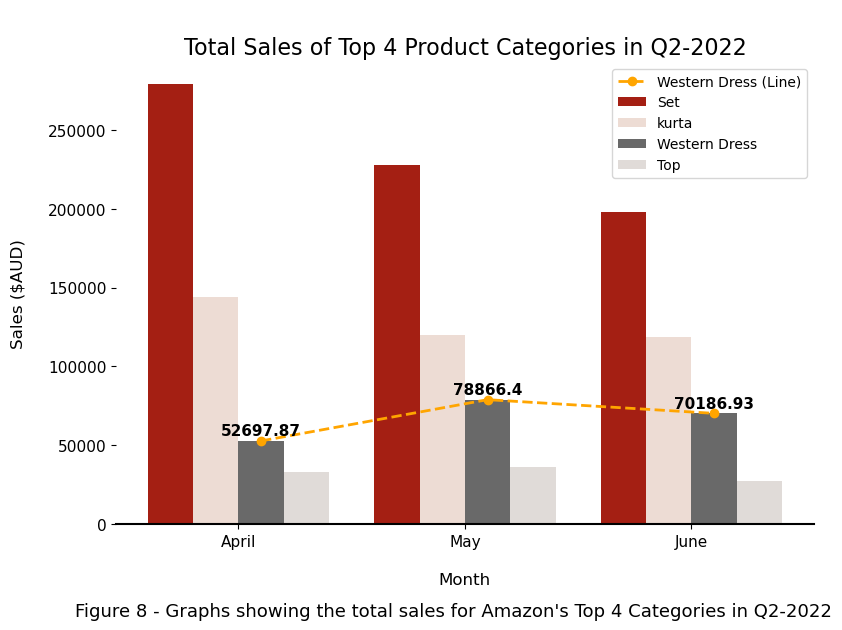

In [35]:
# Dataframe of top 4 categories
df1_cat = df1[df1['category'].isin(['Set','kurta','Western Dress','Top'])]

# Month order
order = ['April','May','June']

# Dataframes for each category
set_df = df1_cat[df1_cat['category']=='Set']
kurta_df = df1_cat[df1_cat['category']=='kurta']
wd_df = df1_cat[df1_cat['category']=='Western Dress']
top_df = df1_cat[df1_cat['category']=='Top']

# Sort by month
set_df['month'] = pd.Categorical(set_df['month'], categories=order, ordered=True)
kurta_df['month'] = pd.Categorical(kurta_df['month'], categories=order, ordered=True)
wd_df['month'] = pd.Categorical(wd_df['month'], categories=order, ordered=True)
top_df['month'] = pd.Categorical(top_df['month'], categories=order, ordered=True)

# Monthly total sales of each category
set_sales = np.round(set_df.groupby('month')['order_value'].sum().values,2)
kurta_sales = np.round(kurta_df.groupby('month')['order_value'].sum().values,2)
wd_sales = np.round(wd_df.groupby('month')['order_value'].sum().values,2)
top_sales = np.round(top_df.groupby('month')['order_value'].sum().values,2)

x_axis = np.arange(len(order))

# Bar plot for 4 categories 
plt.figure(figsize=(9, 6))
plt.bar(x_axis - 0.3, set_sales, 0.2, label = 'Set',color='#A41F13')
plt.bar(x_axis - 0.1, kurta_sales, 0.2, label = 'kurta',color='#EDDCD4')
plt.bar(x_axis + 0.1, wd_sales, 0.2, label = 'Western Dress',color='dimgrey')
plt.bar(x_axis + 0.3, top_sales, 0.2, label = 'Top',color='#E0DBD8')

# Add line chart for Western Dress sales
plt.plot(x_axis + 0.1, wd_sales, color='orange', linestyle='--', linewidth=2, marker='o', label='Western Dress (Line)')

# Annotations for the line chart
for i, val in enumerate(wd_sales):
    plt.text(x_axis[i]+0.1, val + max(wd_sales)*0.02, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
plt.xticks(x_axis, order, fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('\nMonth', fontsize = 12)
plt.ylabel('Sales ($AUD)\n', fontsize = 12)
plt.title('\nTotal Sales of Top 4 Product Categories in Q2-2022', fontsize = 16)
plt.figtext(0.5, -0.05, "Figure 8 - Graphs showing the total sales for Amazon's Top 4 Categories in Q2-2022", ha='center', va='bottom', fontsize=13)
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)

plt.show()


<br><h3>Identifying Top 3 Product Categories by Total Sales for Top 5 States

<p style='font-size:16px; text-align: justify'>
    <b>Figure 9</b> below shows that the top 3 product categories by total sales are the same for the top 5 states, which consists of the 'Set', 'kurta', and 'Western Dress' categories.
</p><br>

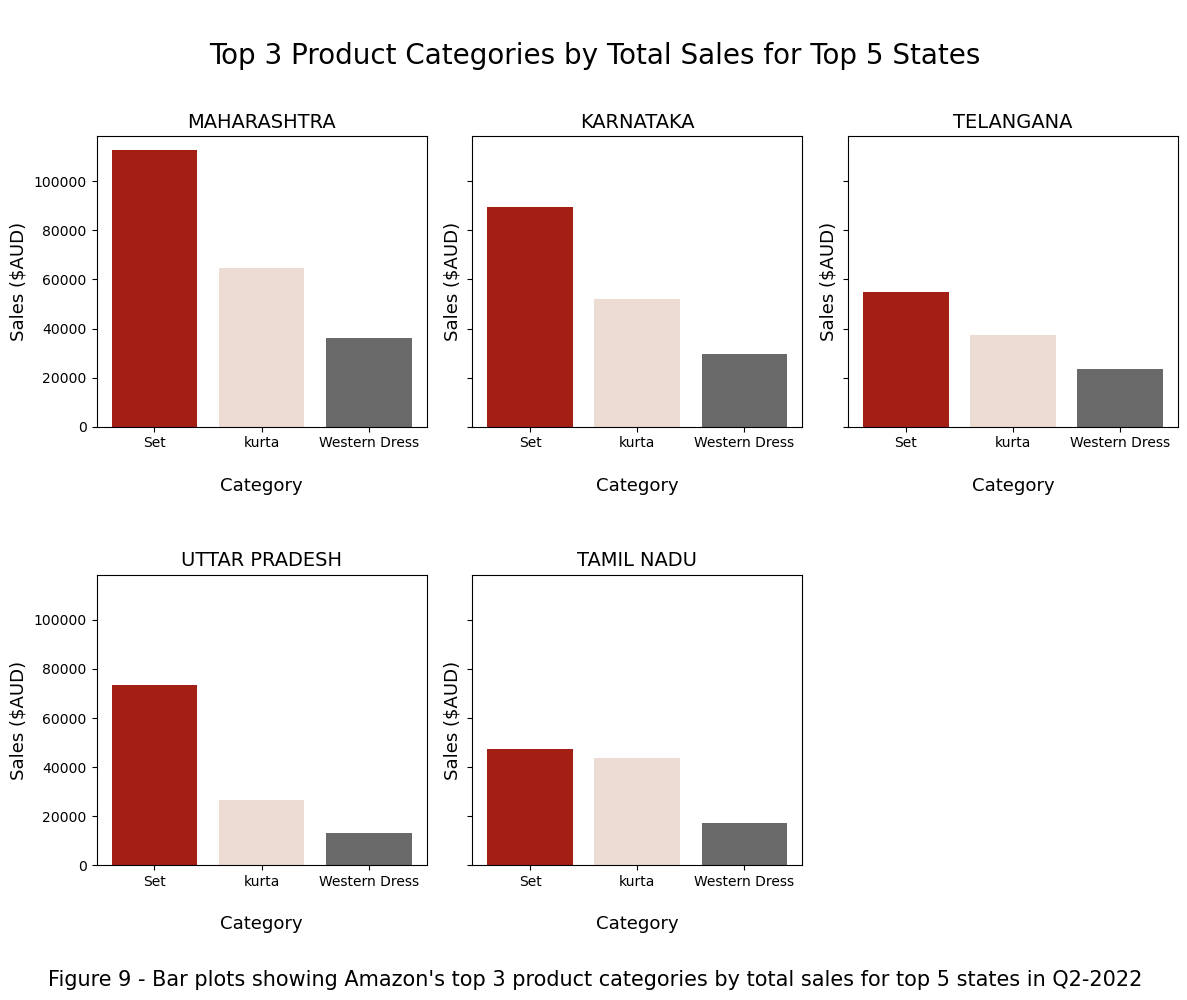

In [45]:
salesByState = df1.groupby('state')['order_value'].sum().sort_values(ascending=False)
# Top 5 states by Revenue
top5_states = salesByState[:5].index
top5_df = df1[df1['state'].isin(top5_states)]

f,ax = plt.subplots(nrows=2, ncols=3, figsize=(12,10), sharey=True)

ax=ax.flatten()

for i, state in enumerate(top5_states):
    top3_categories = top5_df[top5_df['state']==state].groupby('category')['order_value'].sum().nlargest(3)
    ax[i].bar(top3_categories.index,top3_categories.values, color = ['#A41F13','#EDDCD4','dimgrey'])
    ax[i].set_title(state, fontsize = 14)
    ax[i].set_xlabel('\nCategory\n\n', fontsize = 13)
    ax[i].set_ylabel('Sales ($AUD)', fontsize = 13)
    
f.delaxes(ax[5]) #remove unused subplot(last one)

plt.suptitle('\nTop 3 Product Categories by Total Sales for Top 5 States\n', fontsize=20)
plt.figtext(0.5, 0, "Figure 9 - Bar plots showing Amazon's top 3 product categories by total sales for top 5 states in Q2-2022", ha='center', va='bottom', fontsize=15)
plt.tight_layout()
plt.show()

<hr><br><br><h2>Visualising Amazon Total Sales by Product Size in Q2-2022<br>

In [37]:
salesBySize = df1.groupby('size')['order_value'].sum().sort_values(ascending=False)
salesBySize

size
M       249958.05
L       237843.71
XL      224057.32
XXL     191212.11
S       191087.00
3XL     164692.57
XS      126262.69
6XL      10351.71
5XL       7635.11
4XL       6019.74
Free      3693.03
Name: order_value, dtype: float64

In [38]:
# Combine least 4 profitable sizes
otherSizes = round((salesBySize[salesBySize.index[-4:]].sum()),2)
# Drop least 4 profitable sizes
salesBySize = salesBySize.drop(salesBySize.index[-4:])
# Add 'Others' category
salesBySize['Others'] = otherSizes
salesBySize

size
M         249958.05
L         237843.71
XL        224057.32
XXL       191212.11
S         191087.00
3XL       164692.57
XS        126262.69
Others     27699.59
Name: order_value, dtype: float64

<br><h3>How are total sales distributed across different product sizes in Q2-2022?<br>

<p style='font-size:16px; text-align: justify'>
    <b>Figure 10</b> explores the distribution of total sales across different product sizes in Q2-2022. It shows that M, L, XL, XXL, and S are the top five sizes in terms of total sales, reflecting their high popularity among customers.
</p><br>

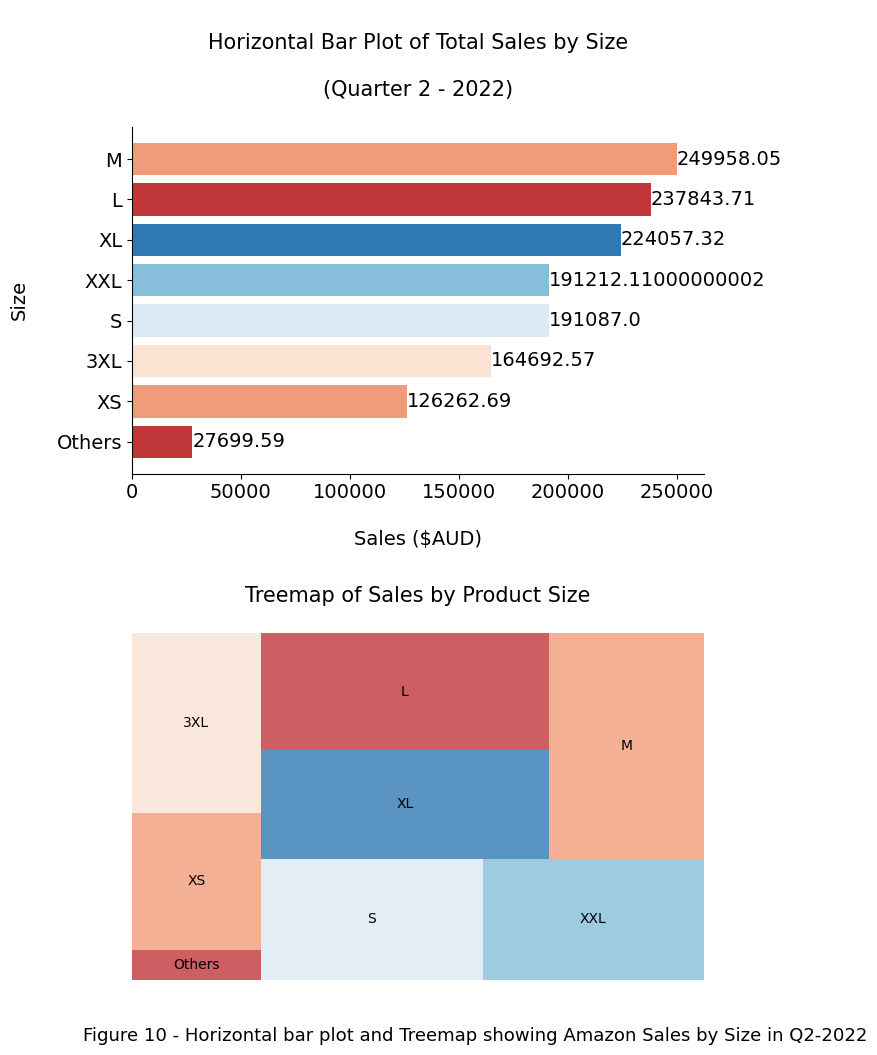

In [46]:
import matplotlib.pyplot as plt
import squarify

salesBySize = salesBySize.sort_values(ascending=True)  # Ensure sorting

colors = sns.color_palette('RdBu')

# Figure and subplots for bar chart and treemap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Horizontal Bar Plot (ax1)
ax1.barh(salesBySize.index, salesBySize.values, color=colors)

ax1.set_title('\nHorizontal Bar Plot of Total Sales by Size\n\n(Quarter 2 - 2022)\n', fontsize=15)
ax1.set_xlabel('\nSales ($AUD)\n', fontsize=14)
ax1.set_ylabel('Size\n', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Add annotations for bar chart (ax1)
for i, val in enumerate(salesBySize):
    ax1.text(val, i, str(val), ha='left', va='center', fontsize=14)

# Spines for bar chart (ax1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Treemap (ax2)
squarify.plot(sizes=salesBySize.values, label=salesBySize.index, alpha=0.8, color=colors, ax=ax2)
ax2.set_title('Treemap of Sales by Product Size\n', fontsize=15)

plt.figtext(0.6, -0.05, "Figure 10 - Horizontal bar plot and Treemap showing Amazon Sales by Size in Q2-2022", ha='center', va='bottom', fontsize=13)
# Hide unnecessary elements for treemap (ax2)
ax2.axis('off')  # Hide x and y axes

# Adjust layout
plt.tight_layout()

plt.show()


<br><h3>How does the quantity sold vary across different product categories and sizes?<br>

<p style='font-size:16px; text-align: justify'>
    <b>Figure 11</b> shows that for the top product categories ('Set','kurta','Top'), the most popular sizes are S, M, L, XL, XXL. Therefore, we should check the stock of these category-size combinations to meet the demands for them.
</p><br>

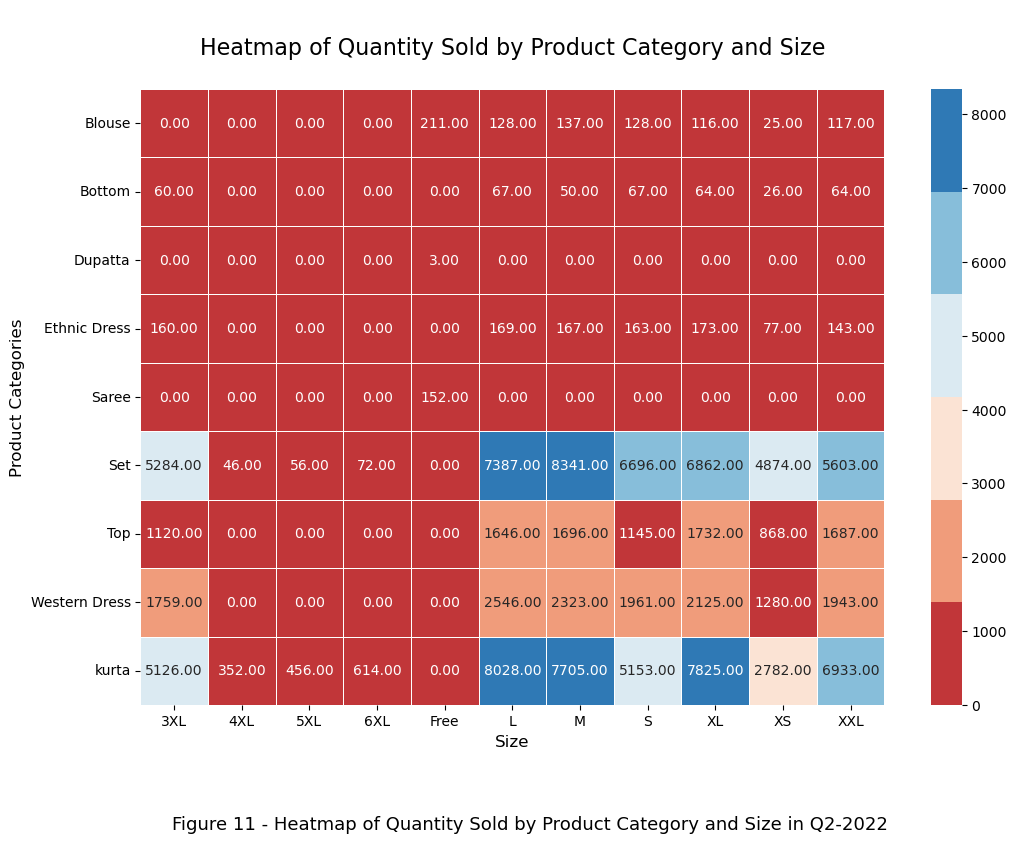

In [40]:
# Heatmap of quantity sold by categories and sizes
heatmap = df1.pivot_table(index='category', columns='size', values='quantity', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, cmap=colors, annot=True, fmt='.2f', linewidths=0.5)
plt.title('\nHeatmap of Quantity Sold by Product Category and Size\n', fontsize = 16)
plt.xlabel('Size', fontsize = 12)
plt.ylabel('Product Categories', fontsize = 12)
plt.figtext(0.45, -0.05, "Figure 11 - Heatmap of Quantity Sold by Product Category and Size in Q2-2022", ha='center', va='bottom', fontsize=13)
plt.show()

<br><h3>Stock Level of Different Sizes for Top Product Categories<br>

In [41]:
size_order = ['XS','S','M','L','XL','XXL', 'XXXL', '4XL', '5XL', '6XL','FREE']
df2['size'] = pd.Categorical(df2['size'],categories=size_order,ordered=True)
size_stock = df2.groupby('size')['stock'].sum()
size_stock

size
XS      35082.0
S       41872.0
M       37163.0
L       32953.0
XL      32046.0
XXL     30683.0
XXXL    21596.0
4XL       978.0
5XL      1061.0
6XL      1111.0
FREE     7841.0
Name: stock, dtype: float64

In [42]:
size_stock_set = df2[df2['category']=='SET'].groupby('size')['stock'].sum()
size_stock_kurta = df2[df2['category']=='KURTA'].groupby('size')['stock'].sum()
size_stock_top = df2[df2['category']=='TOP'].groupby('size')['stock'].sum()
print('\nStock of Set:\n',size_stock_set)
print('\nStock of Kurta:\n',size_stock_kurta)
print('\nStock of Top:\n',size_stock_top)


Stock of Set:
 size
XS      3821.0
S       4175.0
M       3764.0
L       2951.0
XL      3282.0
XXL     3535.0
XXXL    2908.0
4XL       79.0
5XL       67.0
6XL       61.0
FREE       0.0
Name: stock, dtype: float64

Stock of Kurta:
 size
XS      13501.0
S       19283.0
M       17965.0
L       17278.0
XL      16697.0
XXL     16396.0
XXXL    10277.0
4XL       898.0
5XL       994.0
6XL      1050.0
FREE        0.0
Name: stock, dtype: float64

Stock of Top:
 size
XS      2483.0
S       2584.0
M       2804.0
L       2416.0
XL      2412.0
XXL     2248.0
XXXL    1662.0
4XL        0.0
5XL        0.0
6XL        0.0
FREE       0.0
Name: stock, dtype: float64


<br><p style='font-size:16px; text-align: justify'>
    <b>Figure 12</b> shows that the most common sizes (S, M, L, XXL, XXXL) generally have higher stock levels for all three categories (Set, Kurta, Top). This suggests good stock availability for these popular sizes. However, it also reveals potential stock management issues: <br>
    - 'Set' and 'Kurta' categories appear to have low stock for sizes 4XL, 5XL, and 6XL. Additionally, they are completely out of stock for the Free size.<br>
    - Meanwhile, sizes 4XL, 5XL, 6XL, and "Free" of 'Top' are completely out of stock.
 <br> Potential adjustments for these include increasing stock levels for popular sizes (S, M, L, XXL, XXXL) to meet anticipated demand and replenishing low stock for sizes 4XL, 5XL, 6XL, and Free.
</p><br>

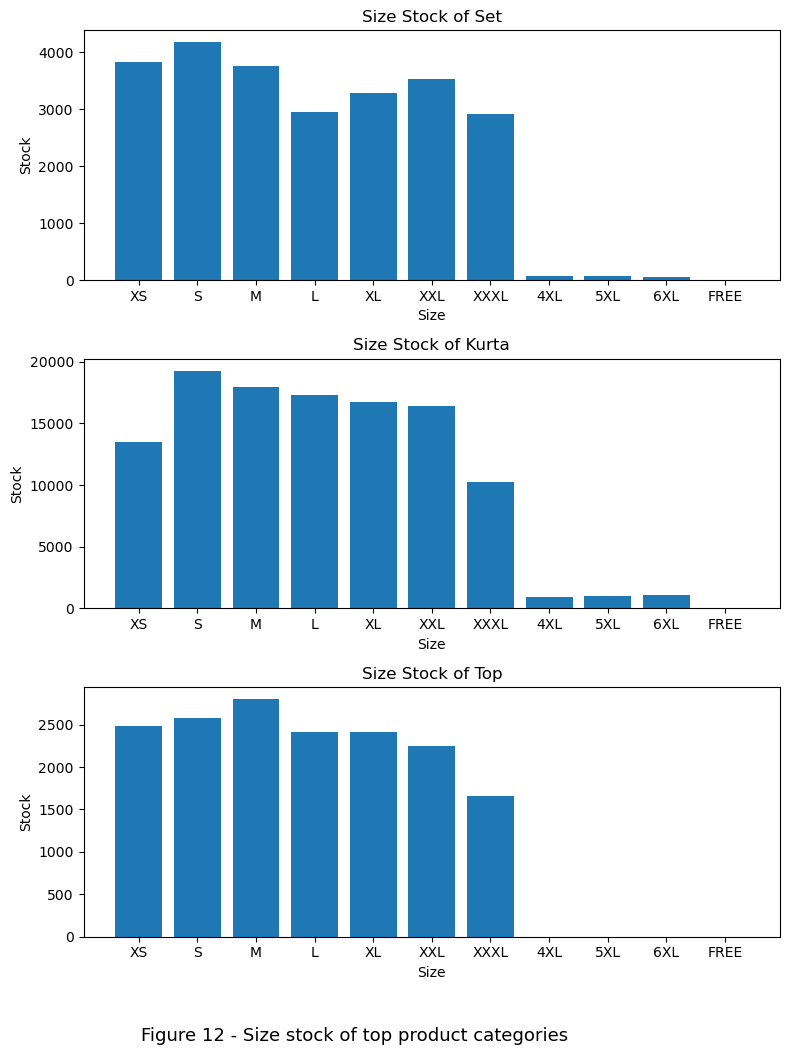

In [43]:
# Create a figure with 1 row and 3 columns for subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 10))

# Plot size_stock_set on ax1
ax1.bar(size_stock_set.index, size_stock_set.values)
ax1.set_title('Size Stock of Set')
ax1.set_xlabel('Size')
ax1.set_ylabel('Stock')

# Plot size_stock_kurta on ax2
ax2.bar(size_stock_kurta.index, size_stock_kurta.values)
ax2.set_title('Size Stock of Kurta')
ax2.set_xlabel('Size')
ax2.set_ylabel('Stock')

# Plot size_stock_top on ax3
ax3.bar(size_stock_top.index, size_stock_top.values)
ax3.set_title('Size Stock of Top')
ax3.set_xlabel('Size')
ax3.set_ylabel('Stock')

plt.figtext(0.45, -0.05, "Figure 12 - Size stock of top product categories", ha='center', va='bottom', fontsize=13)
# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()